In [24]:
#dataset set up
from torch.utils.data import Dataset
from torchvision.transforms import RandomCrop, ToTensor
from PIL import Image
import pandas as pd
import pickle
import os
from torchvision import transforms


class ProductsDataset(Dataset):
    def __init__(self) -> None:
        super().__init__()
        self.data_products = pd.read_csv("../Products.csv", index_col=0, lineterminator='\n')
        self.data_images = pd.read_csv("../Images.csv",index_col=0)

        self.encoder_dict = self.init_encoder()
        decoder_dict = self.init_decoder()

        #self.min_image_size = self._min_image_size()

        #self.pil_to_tensor = ToTensor()
        #self.resize = RandomCrop(140,140)

        self.data_example = self._data_transform()

        self.transform = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])


    def init_encoder(self):
        encoding_dict = {category:code for code, category in enumerate(set(self.data_products.category.apply(lambda x: str(x.split("/")[0]).strip())))}
        #print("length dict encoder "+ str(len(encoding_dict)))
        file = open("encoder.pkl", 'wb')
        pickle.dump(encoding_dict, file)
        file.close()
        return encoding_dict

    def init_decoder(self):
        decoding_dict = encoding_dict = {code:category for category, code in self.encoder_dict.items()}
        
        file = open("decoder.pkl", 'wb')
        pickle.dump(encoding_dict, file)
        file.close()
        return decoding_dict

    def encoding(self):
        self.data_products["label"] = self.data_products.category.apply(lambda x: self.encoder_dict.get(str(x.split("/")[0]).strip()))

    def _data_transform(self):
        self.encoding()

        #self.data_products.rename({self.data_products.id:"product_id"}, inplace=True)
        self.data_products['product_id'] = self.data_products['id']
        self.data_images['images_id'] = self.data_images['id']
        data = pd.merge( left=self.data_images, right=self.data_products[["product_id", "label"]], how="left", on='product_id')
        data = data[["images_id", "label"]]
        return data

    def _min_image_size(self):
        images = os.listdir("../images/")
        check_min_size = []
        for im in images:
            im =Image.open("../images/"+im)
            if not check_min_size :
                check_min_size=(im.size)
            if im.size<check_min_size:
                check_min_size = im.size
        #print(check_min_size)
        return check_min_size

    def __len__(self):
        return len(self.data_example)


    def __getitem__(self, index):
        image_file_path, label = (self.data_example.images_id[index], self.data_example.label[index])
        image = Image.open("../images/{}{}".format(image_file_path,".jpg")).convert('RGB')
        image = self.transform(image)
        #features = self.pil_to_tensor(image)
        #features = self.resize(features)
        return image,label






In [18]:
test = ProductsDataset()
test._min_image_size()
example = test[4]
feat, label = example
print(test[0])

#print(label)
#torch.Size([3, 155, 293])
#(12604,)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
(tensor([[[ 0.9988,  0.9988,  1.0159,  ...,  0.2624,  0.2796,  0.2796],
         [ 1.0159,  1.0159,  1.0331,  ...,  0.2967,  0.2967,  0.3138],
         [ 1.0159,  1.0331,  1.0331,  ...,  0.3138,  0.3138,  0.3138],
         ...,
         [-2.0665, -2.0323, -1.8097,  ..., -0.8164, -0.7822, -0.8164],
         [-2.0152, -1.8610, -1.4843,  ..., -0.8164, -0.8164, -0.7822],
         [-1.6042, -1.4500, -1.3987,  ..., -0.8164, -0.7993, -0.8164]],

        [[ 0.9930,  0.9930,  1.0105,  ...,  0.3102,  0.2927,  0.2927],
         [ 0.9930,  0.9930,  1.0105,  ...,  0.3102,  0.2927,  0.2927],
         [ 0.9930,  1.0105,  1.0105,  ...,  0.3102,  0.2752,  0.2752],
         ...,
         [-1.9482, -1.9307, -1.7731,  ..., -0.9153, -0.8803, -0.9153],
         [-1.9132, -1.7731, -1.4930,  ..., -0.9153, -0.9153, -0.8803],
         [-1.5805, -1.4230, -1.4405,  ..., -0.9153, -0.8978, -0.9153]],

        [[ 0.9319,  0.9494,  0.9668,  ...,  0.4091,  0.3742,  0.3393]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'torch.Tensor'>
<class 'torch.Tensor'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([3, 224, 224])


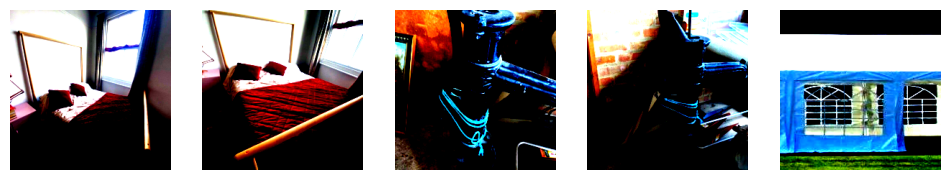

In [19]:
#show the images and 

import numpy as np
import matplotlib.pyplot as plt

def imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

fig, axes = plt.subplots(figsize=(12, 12), ncols=5)
for i in range(5):
    axe1 = axes[i] 
    image , label = test[i]
    imshow(image, ax=axe1, normalize=False)

print(image.size())

In [87]:
#image classifier
from torch.utils.data import Dataset
import torch
from torch.utils.data import DataLoader, random_split
import torch.nn.functional as F
import torch.nn as nn 
import torch.backends.cudnn as cudnn #benchmark checks and selects the fastest conv algorithm
#from torchmetrics import Accuracy
import copy
import matplotlib as plt
from IPython.display import display, clear_output
import torch.optim as optim
from torch.optim import lr_scheduler

class productImageClassifier(torch.nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.resnet50 = resnet50 = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_resnet50', pretrained=True)
        self.resnet50.fc = torch.nn.Linear(2048, 13)#this outputs numbers unormalized - we have 13 categories in the dictionary encoder 


    
    def forward(self, X):
        return self.resnet50(X)

def train(model, train_dataloader, val_dataloader, epochs=25):

    acc=0.0
    logs={"running_acc":[], "num_epochs": []}
    #optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.1)
    for epoch in range(1,epochs+1):
        print("Epoch: "+str(epoch))
        correct=0
        total=0
        model.train()
        for batch in train_dataloader:
            
            features, labels = batch

            with torch.set_grad_enabled(mode=True):
                predictions = model(features)
                labels = labels
                #labels = labels.float()
                #print(predictions.dtype)
                #print(labels.dtype)
                loss_model = nn.CrossEntropyLoss()
                loss = loss_model(predictions, labels)
                loss.backward()

                predictions = torch.argmax(predictions, dim=1)
            #print("Labels: "+ str(labels.dtype))
            #print(labels)
            #print("Perdc: "+ str(predictions.dtype))
            #print(predictions)
            optimizer.step()
            optimizer.zero_grad()
            correct += (predictions == labels).float().sum()
            total+=features.size(0)
            #print("Nums correct:"+str(correct))
            #print("total count:"+str(total))

            exp_lr_scheduler.step()
            #print("Train running acc: "+str(100 * correct.item()/ total))

            #logs["running_acc"].append(correct)
            #logs["num_epochs"].append(total)
            
            if correct>=90:
                best_model_wts = copy.deepcopy(model.state_dict())
                torch.save(model.state_dict(), "model-v2.pt")
                break

        print("Train running acc: "+str(100 * correct.item()/ total))

        with torch.no_grad():
            model.eval()
            correct_val=0
            total_val=0
            for batch_val in val_dataloader:
                features_val, labels_val =  batch_val
                predictions_val = model(features_val.unsqueeze(0))
                predictions_val = torch.argmax(predictions_val, dim=1)
                correct_val += (predictions_val == labels_val).float().sum()
                total_val +=features.size(0)
            print("Validation running acc: "+str(100 * correct_val.item()/ total_val))
        
        torch.save(model.state_dict(), "model-v3.pt")



        
                
    #plt.pyplot.plot(logs.running_acc,logs.num_epochs, 'r')  
    #plt.show() 


def validate_model(model, dataloader, epochs=10):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    model.eval()
    with torch.no_grad():
        for epoch in range(0,epochs): #remover thiss
            for batch in dataloader:
                
                features, labels = batch
                predictions = model(features)
                predictions = torch.argmax(predictions, dim=1)
                correct = (predictions == labels).float().sum()
                print("correct: "+str(100 * correct.item()/ features.size(0)))
                print("/n")

                break



In [88]:
classifier_model =  productImageClassifier()
dataset = ProductsDataset()

train_dataset , val_dataset = random_split(dataset=dataset, lengths=[0.8,0.2], generator=torch.manual_seed(0))


Using cache found in /Users/alexandremoraes/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


In [89]:

train_loader = DataLoader(train_dataset, batch_size=10, shuffle=False)
train(classifier_model, train_loader,val_dataset)

#12604

Epoch: 1
Train running acc: 11.25
Validation running acc: 1.1468253968253967
Epoch: 2
Train running acc: 13.787878787878787
Validation running acc: 1.246031746031746
Epoch: 3
Train running acc: 13.235294117647058
Validation running acc: 1.2777777777777777
Epoch: 4
Train running acc: 13.382352941176471
Validation running acc: 1.1865079365079365
Epoch: 5
Train running acc: 14.444444444444445
Validation running acc: 1.2023809523809523
Epoch: 6
Train running acc: 13.846153846153847
Validation running acc: 1.2896825396825398
Epoch: 7
Train running acc: 13.043478260869565
Validation running acc: 1.257936507936508
Epoch: 8
Train running acc: 13.432835820895523
Validation running acc: 1.253968253968254
Epoch: 9
Train running acc: 14.0
Validation running acc: 1.2380952380952381
Epoch: 10
Train running acc: 13.235294117647058
Validation running acc: 1.242063492063492
Epoch: 11
Train running acc: 12.465753424657533
Validation running acc: 1.2777777777777777
Epoch: 12
Train running acc: 14.4444444

In [ ]:
classifier_model =  productImageClassifier()
dataset = ProductsDataset()

train_dataset , val_dataset = random_split(dataset=dataset, lengths=[0.8,0.2], generator=torch.manual_seed(0))

val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)
validate_model(classifier_model, val_loader)

#12604

In [ ]:
model = productImageClassifier()
model.load_state_dict(torch.load("model-v2.pt"))
model.eval()


Using cache found in /Users/alexandremoraes/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


productImageClassifier(
  (resnet50): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layers): Sequential(
      (0): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inp

In [75]:
image, label = val_dataset[0]
prediction = model(image.unsqueeze(0))
print("Prediction "+ str(torch.argmax(prediction, dim=1).item()))
print("Label: "+str(label))

Prediction 10
Label: 12
